In [1]:
import os
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


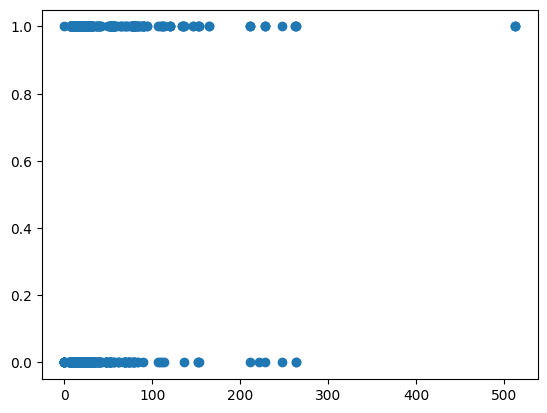

In [3]:
plt.plot(train_df['Fare'], train_df['Survived'], 'o');

''

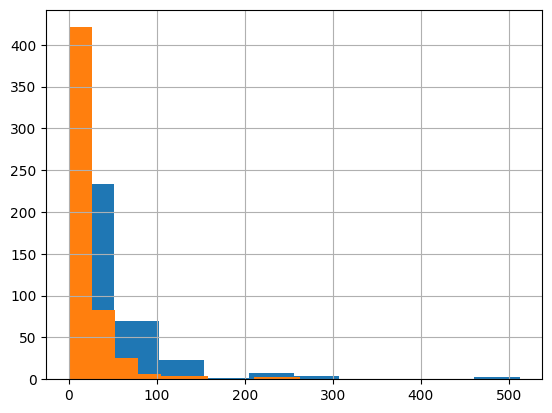

In [4]:
train_df[train_df['Survived'] == 1]['Fare'].hist()
train_df[train_df['Survived'] == 0]['Fare'].hist()
;

In [21]:
#Split for X and Y for train set
Y_train = train_df['Survived']
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_train = X_train[['Pclass', 'Sex', 'Age', 'Parch', 'SibSp', 'Fare']]
X_train['Age'] = X_train['Age'].fillna(np.mean(X_train['Age']))
X_train['Pclass'] = X_train['Pclass'].replace({3: 'third', 2: 'second', 1: 'first'})
X_train = pd.get_dummies(X_train)
X_train['Age'] = [i < 18 for i in X_train['Age']]
X_train['Age'] = X_train['Age'].replace({False: 0, True: 1})
X_train['Fare'] = X_train['Fare'].fillna(np.mean(X_train['Fare']))
X_train

,Age,Parch,SibSp,Fare,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male
0,0,0,1,7.2500,0,0,1,0,1
1,0,0,1,71.2833,1,0,0,1,0
2,0,0,0,7.9250,0,0,1,1,0
3,0,0,1,53.1000,1,0,0,1,0
4,0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,1,0,0,1
887,0,0,0,30.0000,1,0,0,1,0
888,0,2,1,23.4500,0,0,1,1,0
889,0,0,0,30.0000,1,0,0,0,1


In [22]:
#Split for X and Y for test set
X_test = test_df[['Pclass', 'Sex', 'Age', 'Parch', 'SibSp', 'Fare']]
X_test['Age'] = X_test['Age'].fillna(np.mean(X_train['Age']))
#X_test['Fare'] = X_test['Fare'].fillna(np.mean(X_train['Fare']))
X_test['Pclass'] = X_test['Pclass'].replace({3: 'third', 2: 'second', 1: 'first'})
X_test = pd.get_dummies(X_test)
X_test['Age'] = [i < 18 for i in X_test['Age']]
X_test['Age'] = X_test['Age'].replace({False: 0, True: 1})
X_test['Fare'] = X_test['Fare'].fillna(np.mean(X_train['Fare']))
#X_test['Fare'] = (X_test['Fare'] - np.mean(X_test['Fare'])) / np.std(X_test['Fare'])
X_test

,Age,Parch,SibSp,Fare,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male
0,0,0,0,7.8292,0,0,1,0,1
1,0,0,1,7.0000,0,0,1,1,0
2,0,0,0,9.6875,0,1,0,0,1
3,0,0,0,8.6625,0,0,1,0,1
4,0,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,1,0,0,8.0500,0,0,1,0,1
414,0,0,0,108.9000,1,0,0,1,0
415,0,0,0,7.2500,0,0,1,0,1
416,1,0,0,8.0500,0,0,1,0,1


In [23]:
#neuronetwork classifier from tutorial 4
clf = MLPClassifier(hidden_layer_sizes=(70,40),
                    activation='logistic',      #Default activation is 'relu'. Also check 'identity','logistic'
                    max_iter=200,           #Default max_iter is 200
                    solver='lbfgs',           #Default solver is 'adam'. Also, check 'lbfgs'.
                    random_state=42)        #Default n_iter_no_change=10

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_train)
target = le.transform(Y_train)
X_train_dic = X_train.to_dict('records')

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

vec = DictVectorizer()
vec_train = vec.fit_transform(X_train_dic).toarray()
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf = tree_clf.fit(vec_train, target)
y_pred = tree_clf.predict(vec_train)
accuracy_score(target, y_pred)

0.8103254769921436

In [25]:
vec = DictVectorizer()
X_test_dic = X_test.to_dict('records')
vec_test = vec.fit_transform(X_test_dic).toarray()
y_pred_tree = tree_clf.predict(vec_test)

submission_tree = pd.DataFrame(index=test_df.PassengerId)
submission_tree['Survived'] = y_pred_tree
submission_tree

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [26]:
submission_tree.reset_index().to_csv('submissionTree.csv', index=False)

In [27]:
clf.fit(X_train,Y_train)
print('Accuracy on training set:')
y_pred_train=clf.predict(X_train)
accuracy_score(Y_train,y_pred_train)

Accuracy on training set:


0.813692480359147

In [28]:
y_pred_test=clf.predict(X_test)
submission = pd.DataFrame(index=test_df.PassengerId)
submission['Survived'] = y_pred_test
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [29]:
submission.reset_index().to_csv('submission.csv', index=False)

In [30]:
train_df['Title'] = train_df['Name'].str.split(",", expand = True)[1].str.split(".", expand = True)[0]
test_df['Title'] = test_df['Name'].str.split(",", expand = True)[1].str.split(".", expand = True)[0]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [31]:
#Split for X and Y for train set
Y_train = train_df['Survived']
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
#X_train = X_train[['Pclass', 'Sex', 'Age', 'Parch', 'SibSp', 'Fare']]
X_train = train_df[['Pclass', 'Sex', 'Age', 'Title']]
X_train['Pclass'] = X_train['Pclass'].replace({3: 'third', 2: 'second', 1: 'first'})
X_train = pd.get_dummies(X_train)
X_train['Age'] = X_train['Age'].fillna(np.median(X_train['Age']))
X_train['Age'] = [i < 18 for i in X_train['Age']]
X_train['Age'] = X_train['Age'].replace({False: 0, True: 1})
X_train.head()

,Age,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male,Title_ Capt,Title_ Col,Title_ Don,Title_ Dr,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
#Split for X and Y for train set
#X_train = X_train[['Pclass', 'Sex', 'Age', 'Parch', 'SibSp', 'Fare']]
X_test = test_df[['Pclass', 'Sex', 'Age', 'Title']]
X_test['Pclass'] = X_test['Pclass'].replace({3: 'third', 2: 'second', 1: 'first'})
X_test = pd.get_dummies(X_test)
X_test['Age'] = X_test['Age'].fillna(np.median(X_test['Age']))
X_test['Age'] = [i < 18 for i in X_test['Age']]
X_test['Age'] = X_test['Age'].replace({False: 0, True: 1})
X_test.head()

,Age,Pclass_first,Pclass_second,Pclass_third,Sex_female,Sex_male,Title_ Col,Title_ Dona,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev
0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [33]:
X_test = X_test[X_test.columns.intersection(X_train.columns)]
X_train = X_train[X_train.columns.intersection(X_test.columns)]

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

clf = xgb.XGBClassifier(tree_method="hist", learning_rate=0.1, max_depth=3, objective='binary:logistic',
    eval_metric=mean_absolute_error, n_estimators=100)
clf.fit(X_train,Y_train, eval_set=[(X_train,Y_train)])
print('Accuracy on training set:')
y_pred_train=clf.predict(X_train)
accuracy_score(Y_train,y_pred_train)

[0]	validation_0-logloss:0.62704	validation_0-mean_absolute_error:0.45400
[1]	validation_0-logloss:0.59564	validation_0-mean_absolute_error:0.43645
[2]	validation_0-logloss:0.56995	validation_0-mean_absolute_error:0.42073
[3]	validation_0-logloss:0.54858	validation_0-mean_absolute_error:0.40652
[4]	validation_0-logloss:0.53073	validation_0-mean_absolute_error:0.39373
[5]	validation_0-logloss:0.51565	validation_0-mean_absolute_error:0.38221
[6]	validation_0-logloss:0.50159	validation_0-mean_absolute_error:0.37097
[7]	validation_0-logloss:0.48965	validation_0-mean_absolute_error:0.36082
[8]	validation_0-logloss:0.47947	validation_0-mean_absolute_error:0.35165
[9]	validation_0-logloss:0.47077	validation_0-mean_absolute_error:0.34337
[10]	validation_0-logloss:0.46333	validation_0-mean_absolute_error:0.33588
[11]	validation_0-logloss:0.45696	validation_0-mean_absolute_error:0.32911
[12]	validation_0-logloss:0.45149	validation_0-mean_absolute_error:0.32299
[13]	validation_0-logloss:0.44680	v

0.8035914702581369

In [35]:
y_pred_test=clf.predict(X_test)
submissionXG = pd.DataFrame(index=test_df.PassengerId)
submissionXG['Survived'] = y_pred_test
submissionXG

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [36]:
submissionXG.reset_index().to_csv('submissionXG.csv', index=False)

In [37]:
sum(submissionXG['Survived'] == submission_tree['Survived'])

357

In [38]:
len(submissionXG['Survived'])

418

In [39]:
# Random Forest Approach
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 200, random_state=42)   
clf.fit(X_train, Y_train) 
y_pred_train=clf.predict(X_train)
accuracy_score(Y_train,y_pred_train)

0.8047138047138047

In [40]:
y_pred_test=clf.predict(X_test)
submissionRF = pd.DataFrame(index=test_df.PassengerId)
submissionRF['Survived'] = y_pred_test
submissionRF

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [41]:
submissionRF.reset_index().to_csv('submissionRF.csv', index=False)

In [42]:
#Finding the optimal hyperparameters for Decision Tree
tree_clf_2 = DecisionTreeClassifier()
param_grid_tree = {
    'max_depth': [None, 3, 4, 5, 6, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_tree = GridSearchCV(tree_clf_2, param_grid_tree, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_tree.fit(X_train, Y_train)

grid_search_tree.best_params_


Fitting 5 folds for each of 126 candidates, totalling 630 fits


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [43]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_clf_optimized = DecisionTreeClassifier(criterion='entropy', 
                                            max_depth= None , 
                                            min_samples_leaf=2, 
                                            min_samples_split=5)

tree_clf_optimized.fit(X_train, Y_train)
train_predictions_optimized = tree_clf_optimized.predict(X_train)
train_accuracy_optimized = accuracy_score(Y_train, train_predictions_optimized)
train_accuracy_optimized

0.8035914702581369

In [45]:
y_pred_test=tree_clf_optimized.predict(X_test)
submissionRF = pd.DataFrame(index=test_df.PassengerId)
submissionRF['Survived'] = y_pred_test
submissionRF

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [46]:
submissionRF.reset_index().to_csv('submissionTree.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=352484e0-0ab1-4ca4-82c8-fad50647b2be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>